In [25]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [6]:
### Example
s, t = sp.symbols('s, t')
w = sp.symbols('w', real = True)
expression = s/(s**2+w**2)

sp.inverse_laplace_transform(expression, s, t)

cos(t*w)*Heaviside(t)

In [13]:
### SIMPLE VERSION OF MY PROBLEM: 
s, x = sp.symbols('s, x')
T_l = sp.symbols('T_l', real = True)
T_0 = sp.symbols('T_0', real = True)
K   = sp.symbols('K', real = True)

expression = sp.exp(-sp.sqrt(s/K)*x)

sp.inverse_laplace_transform(expression, s, x)

InverseLaplaceTransform(exp(-x*sqrt(s/K)), s, x, _None)

In [17]:
### okay let's try a simplified version??
s, x = sp.symbols('s, x')
T_l = sp.symbols('T_l', real = True)
T_0 = sp.symbols('T_0', real = True)
K   = sp.symbols('K', real = True)

expression = (T_l - (T_0/s))*sp.exp(-sp.sqrt(s/K)*x) + (T_0/s)

sp.inverse_laplace_transform(expression, s, t)

-T_0*InverseLaplaceTransform(exp(-x*sqrt(s/K))/s, s, t, _None) + T_0*Heaviside(t) + T_l*InverseLaplaceTransform(exp(-x*sqrt(s/K)), s, t, _None)

## 2 What a character

In [103]:
def beam_pde(x,t): 
    term1 = ((x**-2)+ 2*t)**-1
    return 1/(1+term1)

In [104]:
#### Parameters & Meshgrid Set-Up 
xl, xr = 0, 5  ### x left and x right
tl, tr = 0, 5  ### t left and t right

#### Set up space for meshgrid with table
xx = np.linspace(xl, xr,50)
tt = np.linspace(tl,tr,50)

## intialize meshgrid (our 3D space)
xxx, ttt = np.meshgrid(xx, tt, sparse=False)

In [105]:
## solve for solution
soln = beam_pde(xxx, ttt)

C:\Users\annav\AppData\Local\Temp\ipykernel_10272\1108215517.py:2: RuntimeWarning: divide by zero encountered in power
  term1 = ((x**-2)+ 2*t)**-1


In [106]:
## let's check that we have a numerical soln 
print(soln)

[[1.         0.98969497 0.96001599 ... 0.04166522 0.040016   0.03846154]
 [1.         0.9897166  0.96033962 ... 0.19843427 0.19728081 0.19619423]
 [1.         0.98973813 0.96065805 ... 0.31112395 0.31027219 0.30947012]
 ...
 [1.         0.99062194 0.9710998  ... 0.90597362 0.90595777 0.90594287]
 [1.         0.99063985 0.97126925 ... 0.90774393 0.90772867 0.90771433]
 [1.         0.9906577  0.97143673 ... 0.90944881 0.9094341  0.90942029]]


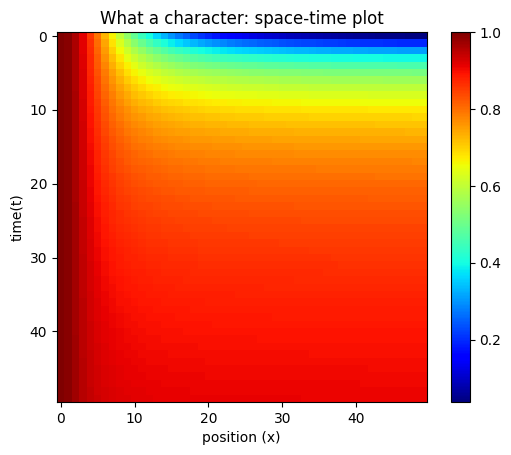

In [107]:
### plot in 2D
plt.imshow(soln,cmap='jet')
plt.xlabel("position (x)")
plt.ylabel("time(t)")
plt.title("What a character: space-time plot")
plt.colorbar()

## Problem 3

In [232]:
import numpy as np
import scipy as sp

In [233]:
def thermal_pde(x, t, L, K, T_0): 
    term1 = L*x*np.exp((-x**2)/(4*k*t))
    term2 = 2*np.sqrt(np.pi)*np.sqrt(K)*(t**(3/2))
    return (term1/term2) + T_0

In [250]:
def thermal_pde2(x, t, L, K, T_0): 
    term1 = -sp.special.erfc(x/(x*(np.sqrt(K*t))))
    term2 = L*x*np.exp((-x**2)/(4*k*t))
    term3 = 2*np.sqrt(np.pi)*np.sqrt(K)*(t**(3/2))
    return T_0*term1+(term2/term3) + T_0

In [251]:
#### Parameters & Meshgrid Set-Up 
xl, xr = 0.001, 10  ### x left and x right
tl, tr = 0.001, 15  ### t left and t right

#### Set up space for meshgrid with table
xx = np.linspace(xl, xr,50)
tt = np.linspace(tl,tr,50)

## intialize meshgrid (our 3D space)
xxx, ttt = np.meshgrid(xx, tt, sparse=False)

In [252]:
## solve for solution
L = 10
T_0 = 280
K = 0.1
soln = thermal_pde2(xxx, ttt, L, K, T_0)

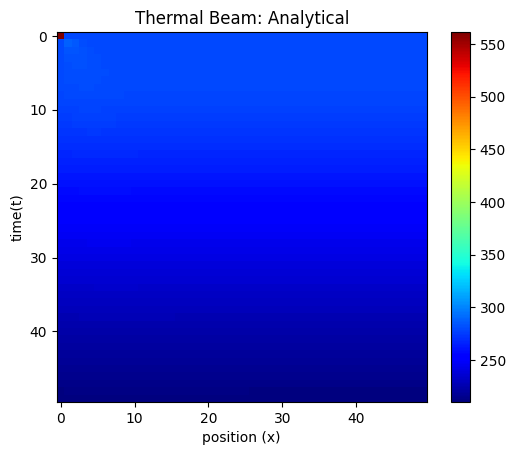

In [253]:
### plot in 2D
plt.imshow(soln,cmap='jet')
plt.xlabel("position (x)")
plt.ylabel("time(t)")
plt.title("Thermal Beam: Analytical")
plt.colorbar()

In [213]:
#### I could plot at t = 5
## solve for solution
L = 10
T_0 = 220
K = 0.1
t5_soln = thermal_pde(xx, 5, L, K, T_0)


Text(0.5, 1.0, 'Thermal Beam T - T_0 at t = 5')

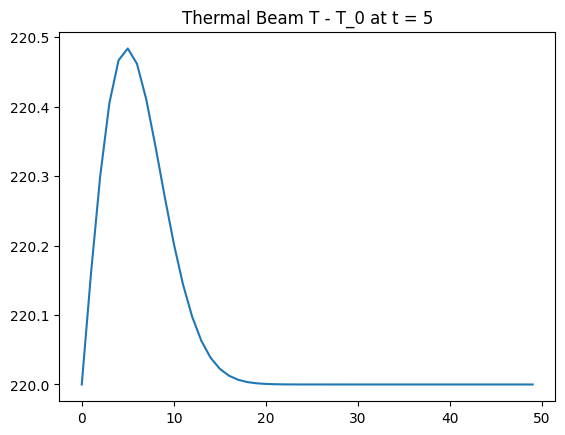

In [225]:
plt.plot(t5_soln)
plt.title("Thermal Beam T - T_0 at t = 5")
plt.ylabel("Temperature")
plt.xlabel("")

In [177]:
def thermal_pde2(x, t, L, K, T_0): 
    term1 = L*x*np.exp((-x**2)/(4*K*t))
    term2 = 2*np.sqrt(np.pi)*np.sqrt(K)*(t**(3/2))
    return (term1/term2) 

In [178]:
#### Parameters & Meshgrid Set-Up 
xl, xr = 0, 10  ### x left and x right
tl, tr = 10**-14, 10**-1  ### t left and t right

#### Set up space for meshgrid with table
tt = np.linspace(tl,tr,50)

## intialize meshgrid (our 3D space)
#xxx, ttt = np.meshgrid(xx, tt, sparse=False)

In [179]:
## Analytical of T - T_0 at end point: 
## solve for solution
L = 10
T_0 = 220
K = 0.1
x = 10
t = thermal_pde2(x, tt, L, K, T_0)

In [180]:
print(t)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


C:\Users\annav\AppData\Local\Temp\ipykernel_10272\1773895146.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


Text(0.5, 1.0, 'No solution :(')

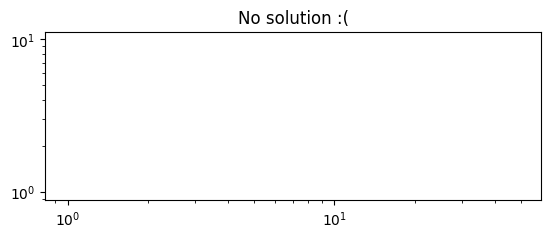

In [229]:
### No solution
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line = ax.plot(t)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title("No solution :(")